In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import  img_to_array

import numpy as np

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 960M (0000:01:00.0)


In [2]:
# Image manipulations and arranging data
import os
from PIL import Image
import theano
theano.config.optimizer="None"

In [3]:
#Sklearn to modify the data

from sklearn.cross_validation import train_test_split

/home/garvit/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# input image dimensions
m, n = 124, 124

In [5]:
path1 = "/home/garvit/Desktop/deeplearning/statefarm/sample/test/"
path2 = "/home/garvit/Desktop/deeplearning/statefarm/sample/train/"

In [6]:
classes = os.listdir(path2)
x = []
y = []

In [7]:
for fol in classes:
    print fol
    
    imgfiles = os.listdir(path2 + '/' + fol);
    
    for img in imgfiles:
        im = Image.open(path2 + '/' + fol + '/' + img);
        im = im.convert(mode = 'RGB')
        imrs = im.resize((m,n))
        imrs = img_to_array(imrs)/255;
        imrs = imrs.transpose(2,0,1);
        imrs = imrs.reshape(3,m,n);
        x.append(imrs)
        y.append(fol)

c4
c5
c1
c6
c8
c9
c2
c3
c0
c7


In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
batch_size = 16
nb_classes = len(classes)
nb_epoch = 20
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)

uniques, id_train = np.unique(y_train, return_inverse=True)
Y_train = np_utils.to_categorical(id_train, nb_classes)
uniques, id_test = np.unique(y_test, return_inverse=True)
Y_test = np_utils.to_categorical(id_test, nb_classes)

In [12]:
model= Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, border_mode='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'));

model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));

model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));
model.add(Dropout(0.5));

model.add(Flatten());
model.add(Dense(128));
model.add(Dropout(0.5));

model.add(Dense(nb_classes));
model.add(Activation('softmax'));
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [ ]:
nb_epoch = 5
batch_size = 5

model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1,validation_data=(x_test, Y_test))

Train on 4345 samples, validate on 1087 samples
Epoch 1/5
  55/4345 [..............................] - ETA: 6900s - loss: 5.3522 - acc: 0.1455

In [15]:
files = os.listdir('/home/garvit/Desktop/deeplearning/statefarm/test/')
img = files[0]
im = Image.open('/home/garvit/Desktop/deeplearning/statefarm/test' + '/' + img)

imrs = im.resize((m,n))
imrs = img_to_array(imrs)/255
imrs = imrs.transpose(2,0,1)
imrs = imrs.reshape(3,m,n)

In [16]:
x = []
x.append(imrs)
x = np.array(x)
predictions = model.predict(x)

In [18]:
print predictions, img

[[  1.89517289e-02   1.47645315e-02   1.17944749e-02   9.22473133e-01
    1.15989856e-02   2.07890324e-07   1.23922369e-02   9.41202394e-04
    2.20840820e-03   4.87513281e-03]] img_42827.jpg


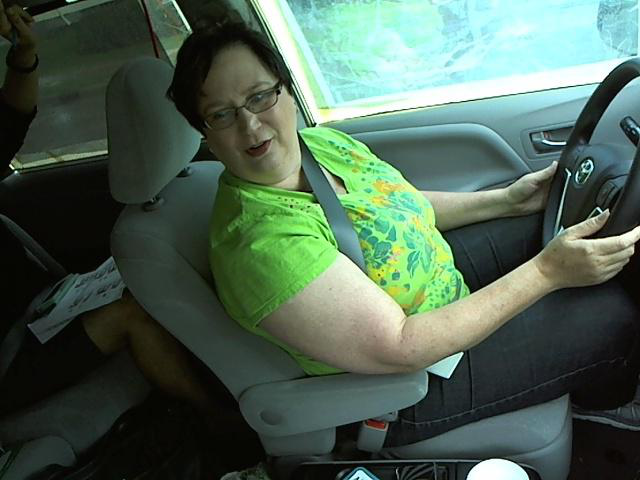

In [20]:
from PIL import Image
Image.open('/home/garvit/Desktop/deeplearning/statefarm/' + 'test/' + files[0])